In [1]:
#%% Import packages
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set path for import 
path = 'results/run_rf1_t60/data/results_1_run_1001.pkl'

# Import data from pkl
[run_results, run_explorations, run_total_rewards, episode_details, state, best_run_number, 
    best_run_reward] = pd.read_pickle(path)

# Set defaults
simulation_duration = 60
adjust_plot_factor = 0
size=14

print('Data imported from {}'.format(path))

Data imported from results/run_rf1_t60/data/results_1_run_1001.pkl


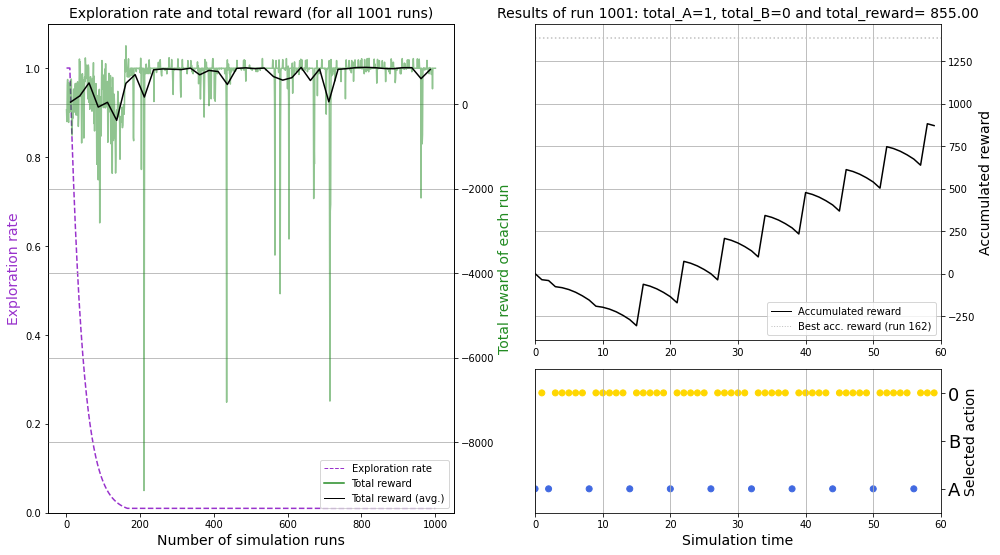

In [2]:
#%% PLOT 1: Recreate the simple visualization during training of the factory_agent 

# Set up chart and axes (ax1 and ax2 share x-axis to combine two plots on one graph)
fig = plt.figure(figsize=(16,9)) 
# Plot exploration rate of all runs
ax1 = fig.add_subplot(121)
# Plot the total rewards of all runs
ax2 = ax1.twinx()
# Plot the decisions made by the agent 
ax3 = fig.add_subplot(3,2,6) #ax3.twinx()
# Plot the accumulated rewards of the current run 
ax4 = fig.add_subplot(3,2,(2,4), sharex=ax3)

# Clear previous plot on ax 1
ax1.clear()
# Set labels
ax1.set_xlabel('Number of simulation runs', size=size)
ax1.set_ylabel('Exploration rate', color='darkorchid', size=size)
ax1.set_ylim(0, 1.1)
# Plot data
ax1.plot(run_results, run_explorations, label='Exploration rate', color='darkorchid', linestyle='--')

# Clear previous plot on ax 2
ax2.clear()
# Set labels
ax2.set_ylabel('Total reward of each run', color='forestgreen', size=size)
# Set title
ax2.set_title('Exploration rate and total reward (for all {} runs)'.format(len(run_results)), size=size)

# Plot data
ax2.plot(run_results, run_total_rewards, label='Reward', color='forestgreen', alpha=0.5)
# Calculate and plot average rewards 
if len(run_results) < 250:
    n=10
else:
    n=25
# Calculate average reward for each n simulation run
avg_rewards = [ sum(run_total_rewards[i:i+n])/n for i in range(0, len(run_total_rewards), n) ]
# Plot data
ax2.plot(range((n//2), len(avg_rewards)*n, n)[:-1], avg_rewards[:-1], color='black')

# Add grid
ax2.grid()
# Add a custom legend
legend_lines = [Line2D([0], [0], color='darkorchid', linestyle='--', lw=1), Line2D([0], [0], color='forestgreen'), Line2D([0], [0], color='Black', lw=1)]
ax2.legend(legend_lines, ['Exploration rate', 'Total reward', 'Total reward (avg.)'], loc=4)    

# Clear previous plot on ax 3
ax3.clear()
# Set labels
ax3.set_ylabel('Selected action', size=size)
ax3.set_xlabel('Simulation time', size=size)
# Limit and rename labels
ax3.set_ylim(-0.5,2.5)
ax3.set_yticks([0,1,2])
ax3.set_yticklabels(['A', 'B', '0'], size=18)
ax3.get_yticklabels()[0].set_color('royalblue')
ax3.get_yticklabels()[1].set_color('firebrick')
ax3.get_yticklabels()[2].set_color('gold')
# Move label to the right for readablility
ax3.yaxis.set_label_position('right')
ax3.yaxis.tick_right()
# Prepare actions and get color
actions = episode_details['actions'] 
marker_color = [ 'royalblue' if v==0 else 'firebrick' if v==1 else 'gold' for v in actions ]
# Plot data 
ax3.scatter(range(len(actions)), actions, label='actions', color=marker_color)
# Add grid
ax3.xaxis.grid()

# Adjust rewards for negative reward term (-20)
rewards = [e+adjust_plot_factor for e in episode_details['rewards']]
# Accumulate rewards for sum up to timestep 
rewards_step = [ sum(rewards[:i]) for i in range(len(rewards))]
# Clear plot of previous run
ax4.clear()
# Set title
ax4.set_title('Results of run {r}: total_A={a}, total_B={b} and total_reward={t: .2f}'.format(r=len(run_results), a=state[0][-2], b=state[0][-1], t=sum(rewards)), size=size)
# Set labels
ax4.set_ylabel('Accumulated reward', size=size)    
# Set limit 
ax4.set_xlim(0, simulation_duration)
# Plot data
ax4.plot(rewards_step, label='reward', color='black')
# Add best run for reference
ax4.axhline(best_run_reward, color='silver', linestyle=':')
# Move label to the right
ax4.yaxis.set_label_position('right')
ax4.yaxis.tick_right()
# Add grid
ax4.grid()
# Add a custom legend
legend_lines = [Line2D([0], [0], color='Black', lw=1), Line2D([0], [0], color='silver', linestyle=':', lw=1)]
ax4.legend(legend_lines, ['Accumulated reward', 'Best acc. reward (run {})'.format(best_run_number)], loc=4)  

# Show
plt.show()

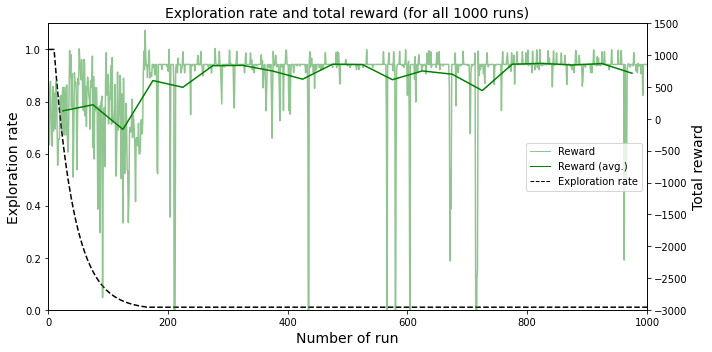

In [3]:
#%% PLOT 2: Plot the exploration rate and the total rewards of each run in a new figure

# Set up new figure (ax5 and ax6 share x-axis to combine two plots on one graph)
fig2 = plt.figure(figsize=(10,5))
# Plot the exploration rate of each run 
ax5 = fig2.add_subplot(111)
# Plot the rewards of each run 
ax6 = ax5.twinx()

# Set plot title
ax5.set_title('Exploration rate and total reward (for all 1000 runs)', size=size)

# Plot exploration rate of all runs
ax5.plot(run_results, run_explorations, color='black', linestyle='--', label='Exploration rate')
# Set lims
ax5.set_xlim(0, 1000)
ax5.set_ylim(0, 1.1)
# Set label
ax5.set_xlabel('Number of run', size=size)
ax5.set_ylabel('Exploration rate', size=size)

# Plot the total rewards of all runs
ax6.plot(run_results, run_total_rewards, color='forestgreen', alpha=0.5, label='Reward')
# Plot the averaged reward 
n=50
ax6.plot(range(25,1001,n), 
    [sum(run_total_rewards[i:i+n])/n for i in range(0,len(run_total_rewards)-1,n)], 
    color='green', label='Reward (avg.)')
# Set lims
ax6.set_ylim(-3000, 1500)
# Set second label to the right
ax6.set_ylabel('Total reward', size=size)
ax6.yaxis.set_label_position('right')

legend_lines = [Line2D([0], [0], color='forestgreen', alpha=0.5, lw=1), 
                Line2D([0], [0], color='green', lw=1), 
                Line2D([0], [0], color='black', linestyle='--', lw=1)]

# Add a legend 
ax6.legend(legend_lines, ['Reward', 'Reward (avg.)', 'Exploration rate'], loc=7)  

# Add tight layout and show 
plt.tight_layout()
plt.show()

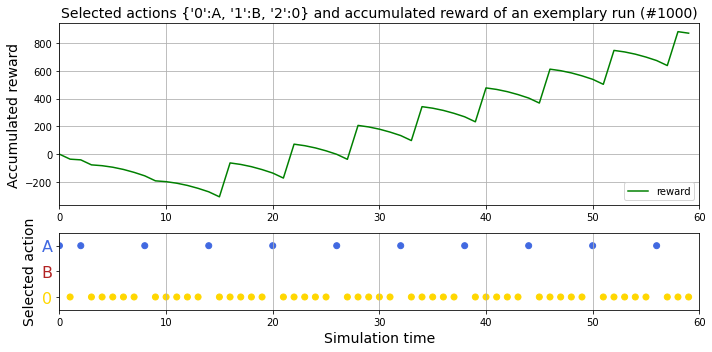

In [4]:
#%% PLOT 3: Plot the accumulated reward and selected actions for the exemplary run of the import 

# Set up new figure (ax7 and ax8 share x-axis to combine two plots on one graph)
fig3 = plt.figure(figsize=(10,5))
# Plot the decisions made by the agent 
ax7 = fig3.add_subplot(313) #ax3.twinx()
# Plot the accumulated rewards of the current run 
ax8 = fig3.add_subplot(3,1,(1,2), sharex=ax7)

# Set plot title
ax8.set_title(r'''Selected actions {'0':A, '1':B, '2':0} and accumulated reward of an exemplary run (#1000)''', size=size)

# Set labels
ax7.set_ylabel('Selected action', size=size)
ax7.set_xlabel('Simulation time', size=size)
# Limit and rename labels
ax7.set_ylim(2.5,-0.5)
ax7.set_yticks([0,1,2])
ax7.set_yticklabels(['A', 'B', '0'], size=16)
ax7.get_yticklabels()[0].set_color('royalblue')
ax7.get_yticklabels()[1].set_color('firebrick')
ax7.get_yticklabels()[2].set_color('gold')

# Prepare actions and get color
actions = episode_details['actions'] 
marker_color = [ 'royalblue' if v==0 else 'firebrick' if v==1 else 'gold' for v in actions ]
# Plot data 
ax7.scatter(range(len(actions)), actions, label='actions', color=marker_color)
# Add grid
ax7.xaxis.grid()

# Accumulate rewards for sum up to timestep 
rewards_step = [ sum(episode_details['rewards'][:i]) for i in range(len(episode_details['rewards']))]

# Set labels
ax8.set_ylabel('Accumulated reward', size=size) 
# Set limit 
ax8.set_xlim(0, simulation_duration)
# Plot data
ax8.plot(rewards_step, label='reward', color='green')

# Add grid
ax8.grid()
# Add a legend
plt.legend(loc=4)

# Add tight layout and show 
plt.tight_layout()
plt.show()

#%%

